# AI and Human AI Performance

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import random
import copy
import pickle
import random
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# ImageNet
##  Load summary fo AI Performance

In [3]:
random.seed(42)

with open('../data/Classification-Summary-ImageNet.pickle', 'rb') as f:
  classification_summary = pickle.load(f)

In [4]:
classification_summary.keys()

dict_keys(['all_gts', 'resnet_wnid', 'knn_wnid', 'emd_wnid', 'chm_wnid', 'resnet_conf', 'knn_conf', 'emd_conf', 'chm_conf', 'resnet_wnid_real', 'knn_wnid_real', 'emd_wnid_real', 'chm_wnid_real', 'resnet_real_conf', 'knn__real_conf', 'emd__real_conf', 'chm__real_conf'])

### Unpacking

In [5]:
real_gt_real = classification_summary['all_gts']

resnet_wnid_real = classification_summary['resnet_wnid_real']
knn_wnid_real    = classification_summary['knn_wnid_real']   
emd_wnid_real    = classification_summary['emd_wnid_real']   
chm_wnid_real    = classification_summary['chm_wnid_real']   

IsM1Correct_real = classification_summary['resnet_wnid_real'] 
IsM2Correct_real = classification_summary['knn_wnid_real']    
IsM3Correct_real = classification_summary['emd_wnid_real']    
IsM4Correct_real = classification_summary['chm_wnid_real']    

M1Conf_real = classification_summary['resnet_real_conf']  
M2Conf_real = classification_summary['knn__real_conf']    
M3Conf_real = classification_summary['emd__real_conf']    
M4Conf_real = classification_summary['chm__real_conf']    

In [6]:
MethodName = ['ResNet', 'KNN', 'EMD', 'CHM']
Methods    = [IsM1Correct_real,IsM2Correct_real,IsM3Correct_real,IsM4Correct_real]
Confs      = [M1Conf_real,M2Conf_real,M3Conf_real,M4Conf_real]

TAnalysis = {}

for N, M, C in zip(MethodName, Methods, Confs):
  TAnalysis[N] = {}
  for T in tqdm(np.arange(0., 1.05, 0.05)):
    TAnalysis[N][round(T, 2)] = np.average([x[0] == (x[1]>=T) for x in zip(M, C)])

100%|██████████| 21/21 [00:00<00:00, 39.02it/s]


In [7]:
TAnalysis[N][round(T, 2)] = np.average([x[0] == (x[1]>=T) for x in zip(M, C)])

In [8]:
def split_data_44(a, b):
  zipped = list(zip(a, b))
  random.shuffle(zipped)
  ra, rb = zip(*zipped)
  return ra[:2000], rb[:2000],  ra[2000:], rb[2000:]

In [9]:
MethodName = ['ResNet', 'KNN', 'EMD', 'CHM']

IsM1Correct_T, M1Conf_T, IsM1Correct_V, M1Conf_V = split_data_44(IsM1Correct_real, M1Conf_real)
IsM2Correct_T, M2Conf_T, IsM2Correct_V, M2Conf_V = split_data_44(IsM2Correct_real, M2Conf_real)
IsM3Correct_T, M3Conf_T, IsM3Correct_V, M3Conf_V = split_data_44(IsM3Correct_real, M3Conf_real)
IsM4Correct_T, M4Conf_T, IsM4Correct_V, M4Conf_V = split_data_44(IsM4Correct_real, M4Conf_real)


Methods_T = [IsM1Correct_T, IsM2Correct_T, IsM3Correct_T, IsM4Correct_T]
Confs_T   = [M1Conf_T, M2Conf_T, M3Conf_T, M4Conf_T]

TAnalysis_T = {}

for N, M, C in zip(MethodName, Methods_T, Confs_T):
  TAnalysis_T[N] = {}
  for T in tqdm(np.arange(0., 1.05, 0.05)):
    TAnalysis_T[N][round(T, 2)] = np.average([x[0] == (x[1]>=T) for x in zip(M, C)])

100%|██████████| 21/21 [00:00<00:00, 874.27it/s]


In [10]:
Methods_V = [IsM1Correct_V, IsM2Correct_V, IsM3Correct_V, IsM4Correct_V]
Confs_V   = [M1Conf_V, M2Conf_V, M3Conf_V, M4Conf_V]

TAnalysis_V = {}

for N, M, C in zip(MethodName, Methods_V, Confs_V):
  TAnalysis_V[N] = {}
  for T in tqdm(np.arange(0., 1.05, 0.05)):
    TAnalysis_V[N][round(T, 2)] = np.average([x[0] == (x[1]>=T) for x in zip(M, C)])

100%|██████████| 21/21 [00:00<00:00, 42.39it/s]


In [11]:
pd.DataFrame(TAnalysis).T.style.background_gradient(axis=1)

In [12]:
pd.DataFrame(TAnalysis_T).T.style.background_gradient(axis=1)

In [13]:
pd.DataFrame(TAnalysis_V).T.style.background_gradient(axis=1)

In [14]:
# Full 44K
pd.DataFrame(TAnalysis).T.style.highlight_max(color = 'yellow', axis = 1);

In [15]:
# 2K Fine-tuning
pd.DataFrame(TAnalysis_T).T.style.highlight_max(color = 'yellow', axis = 1)

In [16]:
# 42K Test PREVIEW
pd.DataFrame(TAnalysis_V).T.loc[:, 0.30:0.5]*100

0.30       0.35       0.40       0.45       0.50
ResNet  85.479917  85.864134  86.083349  86.111635  85.880634
KNN     85.576560  85.866491  85.866491  85.946634  85.569489
EMD     85.732133  85.913634  85.913634  85.821705  85.420988
CHM     85.043843  85.479917  85.479917  85.635489  85.362059

In [17]:
optimal_t = pd.DataFrame(TAnalysis_T).T.idxmax(axis=1)

In [18]:
tdf = pd.DataFrame(TAnalysis_T).T
max_indices = np.where(tdf == tdf.max(axis=1)[:, np.newaxis], tdf.columns, None)
max_indices = np.where(max_indices == None, -1, max_indices)
max_indices =  np.amax(max_indices, axis=1)
max_indices

/var/folders/gs/ftfl94c117q3mq9rqwfnx1mc0000gn/T/ipykernel_61450/3501961810.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  max_indices = np.where(tdf == tdf.max(axis=1)[:, np.newaxis], tdf.columns, None)


array([0.45, 0.45, 0.4, 0.5], dtype=object)

In [19]:
optimal_t

ResNet    0.40
KNN       0.45
EMD       0.35
CHM       0.50
dtype: float64

In [20]:
# clone optimal_t but with values of max_indices
optima_t_max = optimal_t.copy()
optima_t_max[:] = max_indices
optima_t_max

ResNet    0.45
KNN       0.45
EMD        0.4
CHM        0.5
dtype: object

In [21]:
optimal_t = optima_t_max

In [22]:
df = pd.DataFrame(TAnalysis_V).loc[optimal_t, :]
# pick diagonal
ai_performance_values = df.to_numpy()[np.arange(4), np.arange(4)]*100

In [23]:
ai_performance_df = pd.DataFrame(ai_performance_values, index=optimal_t.index, columns=['AI Performance'])

## Final Table for AI Performance

In [24]:
ai_performance_df.round(2) # Final Table for AI Performance

AI Performance
ResNet           86.11
KNN              85.95
EMD              85.91
CHM              85.36

# Human-AI Team Performance

###  Load summary fo AI Performance

In [25]:
random.seed(42)

with open("../data/Classification-Summary-ImageNet.pickle", "rb") as f:
    classification_summary = pickle.load(f)

In [26]:
classification_summary.keys()

dict_keys(['all_gts', 'resnet_wnid', 'knn_wnid', 'emd_wnid', 'chm_wnid', 'resnet_conf', 'knn_conf', 'emd_conf', 'chm_conf', 'resnet_wnid_real', 'knn_wnid_real', 'emd_wnid_real', 'chm_wnid_real', 'resnet_real_conf', 'knn__real_conf', 'emd__real_conf', 'chm__real_conf'])

### Unpacking

In [27]:
real_gt_real = classification_summary["all_gts"]

resnet_wnid_real = classification_summary["resnet_wnid_real"]
knn_wnid_real = classification_summary["knn_wnid_real"]
emd_wnid_real = classification_summary["emd_wnid_real"]
chm_wnid_real = classification_summary["chm_wnid_real"]

IsM1Correct_real = np.asarray(classification_summary["resnet_wnid_real"])
IsM2Correct_real = np.asarray(classification_summary["knn_wnid_real"])
IsM3Correct_real = np.asarray(classification_summary["emd_wnid_real"])
IsM4Correct_real = np.asarray(classification_summary["chm_wnid_real"])

M1Conf_real = np.asarray(classification_summary["resnet_real_conf"])
M2Conf_real = np.asarray(classification_summary["knn__real_conf"])
M3Conf_real = np.asarray(classification_summary["emd__real_conf"])
M4Conf_real = np.asarray(classification_summary["chm__real_conf"])

## AI Performance Analysis

In [28]:
MethodName = ["ResNet", "KNN", "EMD", "CHM"]
Methods = [IsM1Correct_real, IsM2Correct_real, IsM3Correct_real, IsM4Correct_real]
Confs = [M1Conf_real, M2Conf_real, M3Conf_real, M4Conf_real]

TAnalysis = {}
TCount = {}

for N, M, C in zip(MethodName, Methods, Confs):
    TAnalysis[N] = {}
    TCount[N] = {}

    for T in np.arange(0.0, 1.05, 0.05):
        TAnalysis[N][round(T, 2)] = np.mean(M[C >= T])
        TCount[N][round(T, 2)] = len(M[C >= T])


ai_df = pd.DataFrame(TAnalysis)
print("Done")

Done


## Number of Images 

In [29]:
# Number of Images
count_df = pd.DataFrame(TCount)
count_df

ResNet    KNN    EMD    CHM
0.00   44424  44424  44424  44424
0.05   44414  44424  44424  44424
0.10   44296  44418  44420  44421
0.15   43863  43651  43618  43773
0.20   43472  43651  43618  43773
0.25   42839  42879  42809  43070
0.30   41934  40823  40806  41253
0.35   41081  39649  39598  40139
0.40   40353  39649  39598  40139
0.45   39317  38354  38317  38914
0.50   38150  36982  36955  37562
0.55   36718  35422  35344  35917
0.60   35078  32213  32036  32642
0.65   34014  32213  32036  32642
0.70   32363  29073  28883  29575
0.75   31173  29073  28883  29575
0.80   29661  27463  27233  27986
0.85   27492  23697  23244  24132
0.90   25603  23697  23244  24132
0.95   21064  16334  15655  16864
1.00     207  16334  15655  16864

## Ratios (out of 44424 Images)

In [30]:
# RATIOs (out of 44424 Images)
ratio_df = pd.DataFrame(TCount) / len(real_gt_real)
ratio_df

ResNet       KNN       EMD       CHM
0.00  1.000000  1.000000  1.000000  1.000000
0.05  0.999775  1.000000  1.000000  1.000000
0.10  0.997119  0.999865  0.999910  0.999932
0.15  0.987372  0.982599  0.981857  0.985346
0.20  0.978570  0.982599  0.981857  0.985346
0.25  0.964321  0.965222  0.963646  0.969521
0.30  0.943949  0.918940  0.918558  0.928620
0.35  0.924748  0.892513  0.891365  0.903543
0.40  0.908360  0.892513  0.891365  0.903543
0.45  0.885040  0.863362  0.862529  0.875968
0.50  0.858770  0.832478  0.831870  0.845534
0.55  0.826535  0.797362  0.795606  0.808504
0.60  0.789618  0.725126  0.721142  0.734783
0.65  0.765667  0.725126  0.721142  0.734783
0.70  0.728503  0.654444  0.650167  0.665744
0.75  0.701715  0.654444  0.650167  0.665744
0.80  0.667680  0.618202  0.613024  0.629975
0.85  0.618855  0.533428  0.523231  0.543220
0.90  0.576333  0.533428  0.523231  0.543220
0.95  0.474158  0.367684  0.352400  0.379615
1.00  0.004660  0.367684  0.352400  0.379615

## Human Performance Analysis

In [31]:
summary_df = pd.read_csv("../data/ImageNet-Human-Study-Summary.csv")

## Removing Bad Users 

We manually marked two users as **bad** based on their average performance on `1:1` ratio samples

1. `6395881` 
1. `6396044`


And after resampling we excluded these `4` users:

1. `6386000`
1. `6382894`
1. `6385998`
1. `6382878`

In [32]:
summary_df = summary_df[
    ~summary_df["UID"].isin([6395881, 6396044] + [6386000, 6382894, 6385998, 6382878])
]

In [33]:
# summary_df.head()

In [34]:
print(f"total {len(summary_df)} entries")

total 10620 entries


In [35]:
df_treshold = copy.deepcopy(summary_df[["Method", "Correctness", "ConfidenceScore"]])

## Human Performance

In [36]:
ORDER_DICT = {
    "ResNet-50": 1,
    "kNN": 2,
    "EMD-NN": 3,
    "EMD-Corr": 4,
    "CHM-NN": 5,
    "CHM-Corr": 6,
}

In [37]:
human_accuracy = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_accuracy[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .mean()
    )

In [38]:
humand_df = (
    pd.DataFrame.from_dict(human_accuracy)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
    .T
)

humand_df = humand_df.drop("Method")
humand_df.columns = ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
humand_df

ResNet-50       kNN    EMD-NN  EMD-Corr    CHM-NN  CHM-Corr
0.00       NaN       NaN       NaN       NaN       NaN       NaN
0.05       1.0       NaN       NaN       NaN       NaN       NaN
0.10       1.0       1.0       1.0       1.0       NaN       NaN
0.15  0.890909  0.971429  0.961039  0.952941  0.947368  0.918919
0.20  0.859813  0.971429  0.961039  0.952941  0.947368  0.918919
0.25  0.898204  0.902256  0.952381  0.955696  0.889655  0.869863
0.30  0.924107  0.800643  0.883636  0.892734  0.813725  0.819048
0.35  0.891374  0.778626  0.831135  0.851948  0.805774  0.783505
0.40  0.867347  0.778626  0.831135  0.851948  0.805774  0.783505
0.45  0.846154  0.734021  0.814898  0.825893  0.792208  0.773913
0.50  0.837937  0.707826  0.774545  0.791667   0.77881  0.768519
0.55  0.815166  0.679939  0.735878  0.746667   0.73717  0.733542
0.60  0.807956  0.678705  0.704057  0.724018   0.69483  0.703046
0.65     0.805  0.678705  0.704057  0.724018   0.69483  0.703046
0.70  0.778286  0.674317  0.686808   0.70439  0.689873  0.702128
0.75  0.760593  0.674317  0.686808   0.70439  0.689873  0.702128
0.80  0.761044     0.665  0.684564  0.707136  0.692308  0.705645
0.85   0.75653  0.669251   0.69697   0.71741  0.687943  0.693202
0.90  0.756332  0.669251   0.69697   0.71741  0.687943  0.693202
0.95  0.760836  0.704176  0.731529  0.746269  0.714922  0.712984
1.00  0.815248  0.704176  0.731529  0.746269  0.714922  0.712984

In [39]:
def make_table(ai_group, human_group):
    agg_df = pd.DataFrame()
    agg_df["T"] = humand_df.index
    agg_df["T"] = agg_df["T"].astype(float).apply(lambda x: np.round(x, 2))
    agg_df["Ratio of Images Handled by AI"] = ratio_df[ai_group].values
    
    agg_df["AI Alone Performance"] = ai_df[ai_group].values
    agg_df["Human Performance on Remaining Images"] = humand_df[human_group].values
    agg_df["Aggregated Performance"] = (
        agg_df["Ratio of Images Handled by AI"] * agg_df["AI Alone Performance"]
    ) + (
        (1 - agg_df["Ratio of Images Handled by AI"])
        * agg_df["Human Performance on Remaining Images"]
    )

    agg_df = agg_df.set_index("T")

    agg_df["AI Alone Performance"] = (100 * agg_df["AI Alone Performance"]).round(2)
    agg_df["Human Performance on Remaining Images"] = (
        (100 * agg_df["Human Performance on Remaining Images"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Aggregated Performance"] = (
        (100 * agg_df["Aggregated Performance"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Ratio of Images Handled by AI"] = 100*agg_df[
        "Ratio of Images Handled by AI"
    ].round(4)

    return agg_df

In [40]:
method_tables = {}

for ai_group, human_group in zip(
    ["ResNet", "KNN", "EMD", "EMD", "CHM", "CHM"], ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
):
    method_tables[human_group] = make_table(ai_group, human_group)


In [41]:
optimal_t

ResNet    0.45
KNN       0.45
EMD        0.4
CHM        0.5
dtype: object

In [42]:
method_tables['ResNet-50'].loc[[optimal_t['ResNet']]]


Ratio of Images Handled by AI  AI Alone Performance  \
T                                                           
0.45                           88.5                 89.15   

      Human Performance on Remaining Images  Aggregated Performance  
T                                                                    
0.45                                  84.62                   88.63

In [43]:
Aggregated_performance = {}

for ai_group, human_group in zip(
    ["ResNet", "KNN", "EMD", "EMD", "CHM", "CHM"], ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
):
    Aggregated_performance[human_group] = method_tables[human_group].loc[[optimal_t[ai_group]]]['Aggregated Performance'].reset_index(drop=True)

Aggregated_performance_df = pd.DataFrame.from_dict(Aggregated_performance).T

In [44]:
method_tables['ResNet-50'].loc[[optimal_t['ResNet']]]


Ratio of Images Handled by AI  AI Alone Performance  \
T                                                           
0.45                           88.5                 89.15   

      Human Performance on Remaining Images  Aggregated Performance  
T                                                                    
0.45                                  84.62                   88.63

In [45]:
method_tables['kNN'].loc[[optimal_t['KNN']]]


Ratio of Images Handled by AI  AI Alone Performance  \
T                                                           
0.45                          86.34                 89.44   

      Human Performance on Remaining Images  Aggregated Performance  
T                                                                    
0.45                                   73.4                   87.24

In [46]:
ai_performance_df.round(2)

AI Performance
ResNet           86.11
KNN              85.95
EMD              85.91
CHM              85.36

In [47]:
# remove index
Aggregated_performance_df

0
ResNet-50  88.63
kNN        87.24
EMD-NN     87.80
EMD-Corr   88.02
CHM-NN     88.05
CHM-Corr   87.89

In [48]:
# combining two df
# rename index to match the names
ai_performance_df.index = ['ResNet-50', 'kNN', 'EMD-Corr', 'CHM-Corr']

combined_table = pd.concat([ai_performance_df.round(2), Aggregated_performance_df, ], axis=1)
combined_table.columns = ['AI Alone Performance', 'Human-AI Performance']

# calculate the delta
combined_table['Improvement'] = combined_table['Human-AI Performance'] - combined_table['AI Alone Performance']


In [49]:
combined_table

AI Alone Performance  Human-AI Performance  Improvement
ResNet-50                 86.11                 88.63         2.52
kNN                       85.95                 87.24         1.29
EMD-Corr                  85.91                 88.02         2.11
CHM-Corr                  85.36                 87.89         2.53
EMD-NN                      NaN                 87.80          NaN
CHM-NN                      NaN                 88.05          NaN

In [50]:
# drop last two rows
combined_table = combined_table.drop(['EMD-NN', 'CHM-NN'])

In [51]:
combined_table

AI Alone Performance  Human-AI Performance  Improvement
ResNet-50                 86.11                 88.63         2.52
kNN                       85.95                 87.24         1.29
EMD-Corr                  85.91                 88.02         2.11
CHM-Corr                  85.36                 87.89         2.53

In [52]:
# Add a row for calculating the average
combined_table.loc['Average'] = combined_table.mean()

# Paper Table 3 - ImageNet

In [53]:
combined_table.round(2)

AI Alone Performance  Human-AI Performance  Improvement
ResNet-50                 86.11                 88.63         2.52
kNN                       85.95                 87.24         1.29
EMD-Corr                  85.91                 88.02         2.11
CHM-Corr                  85.36                 87.89         2.53
Average                   85.83                 87.94         2.11

## Additional Results 

Trails Breakdown on optimal `T=0.45` for `ResNet-50`

In [112]:
optima_t_max

ResNet    0.45
KNN       0.45
EMD        0.4
CHM        0.5
dtype: object

In [55]:
def get_breakdown_by_t_and_classifier(df, T, classifier="ResNet-50"):
    df_rn_AI = df[df["ConfidenceScore"] >= T]
    df_rn_Human = df[df["ConfidenceScore"] < T]
    return Counter(
        df_rn_Human[df_rn_Human["Method"] == classifier]["ClassifierCorrectness"]
    )

In [56]:
get_breakdown_by_t_and_classifier(summary_df, 0.5, classifier="ResNet-50")

Counter({0: 488, 1: 55})

In [57]:
human_trial_counters = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_trial_counters[f"{T:0.2f}"] = get_breakdown_by_t_and_classifier(summary_df, T, classifier="ResNet-50")

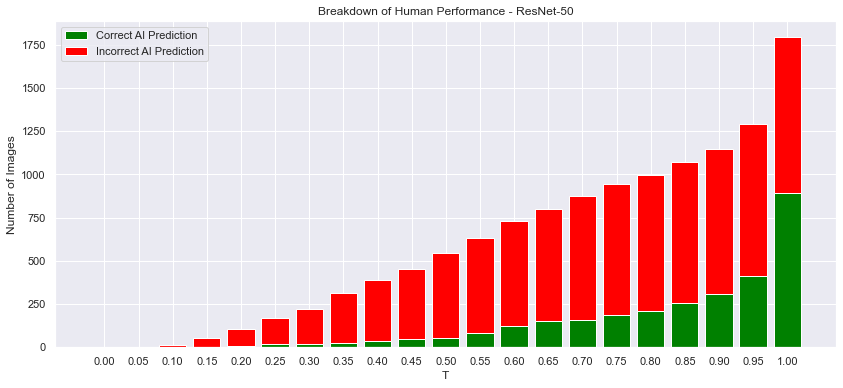

In [58]:
# plot the breakdown
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Breakdown of Human Performance - ResNet-50')

# plot human_trial_counters counters for each T
for T in np.arange(0.0, 1.05, 0.05):
    counter = human_trial_counters[f"{T:0.2f}"]
    ax.bar(f"{T:0.2f}", counter[True], color='green')
    ax.bar(f"{T:0.2f}", counter[False], bottom=counter[True], color='red')

ax.set_xlabel('T')
ax.set_ylabel('Number of Images')
ax.legend(['Correct AI Prediction', 'Incorrect AI Prediction'])
plt.show()

In [59]:
human_count = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_count[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .count()
    )

In [60]:
df_hp = (
    pd.DataFrame.from_dict(human_accuracy)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)

trials_df = (
    pd.DataFrame.from_dict(human_count)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)

In [61]:
# ONLY FOR RESNET-50

classifier_index_dict = {
    "ResNet-50": 1,
    "kNN": 2,
    "EMD-NN": 3,
    "EMD-Corr": 4,
    "CHM-NN": 5,
    "CHM-Corr": 6,
}

classifier_index = classifier_index_dict["ResNet-50"]
detailed_df = df_hp.loc[classifier_index].reset_index()
detailed_df.rename(columns={classifier_index: "Human Performance"}, inplace=True)
detailed_df.rename(columns={"index": "T"}, inplace=True)

detailed_df["# Trials"] = trials_df.loc[classifier_index].reset_index()[
    classifier_index
]
detailed_df = detailed_df.drop(0)

detailed_df["Human Performance"] = detailed_df["Human Performance"] * 100

detailed_df["# Trials"] = detailed_df["# Trials"].astype("Int64")
detailed_df["Human Performance"] = detailed_df["Human Performance"].astype("float")

human_trial_counters_C = [
    x[1] if 1 in x.keys() else 0 for x in human_trial_counters.values()
]
human_trial_counters_W = [
    x[0] if 0 in x.keys() else 1 for x in human_trial_counters.values()
]

detailed_df["# Trials - Correct Prediction"] = human_trial_counters_C
detailed_df["# Trials - Wrong Prediction"] = human_trial_counters_W


In [62]:
detailed_df.round(2)

T  Human Performance  # Trials  # Trials - Correct Prediction  \
1   0.00                NaN      <NA>                              0   
2   0.05             100.00         3                              0   
3   0.10             100.00        16                              0   
4   0.15              89.09        55                              3   
5   0.20              85.98       107                              8   
6   0.25              89.82       167                             17   
7   0.30              92.41       224                             20   
8   0.35              89.14       313                             22   
9   0.40              86.73       392                             34   
10  0.45              84.62       455                             47   
11  0.50              83.79       543                             55   
12  0.55              81.52       633                             85   
13  0.60              80.80       729                            124   
14  0.65              80.50       800                            151   
15  0.70              77.83       875                            160   
16  0.75              76.06       944                            188   
17  0.80              76.10       996                            209   
18  0.85              75.65      1072                            258   
19  0.90              75.63      1145                            310   
20  0.95              76.08      1292                            413   
21  1.00              81.52      1797                            891   

    # Trials - Wrong Prediction  
1                             1  
2                             3  
3                            16  
4                            52  
5                            99  
6                           150  
7                           204  
8                           291  
9                           358  
10                          408  
11                          488  
12                          548  
13                          605  
14                          649  
15                          715  
16                          756  
17                          787  
18                          814  
19                          835  
20                          879  
21                          906

### Plot some of the images

For `ResNet-50` @ `T=0.45`

In [101]:
import torchvision.transforms as transforms
from PIL import Image
import ast

In [64]:
display_transform = transforms.Compose(
    [transforms.Resize(256), transforms.CenterCrop(240)]
)

In [89]:
df_rn_AI = summary_df[summary_df["ConfidenceScore"] >= 0.45]
df_rn_Human = summary_df[summary_df["ConfidenceScore"] < 0.45]

In [97]:
Q = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["Query"].values
G = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["Real GTs"].values
C = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["ResNet-Conf"].values
P = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["ResNet-Prediction"].values

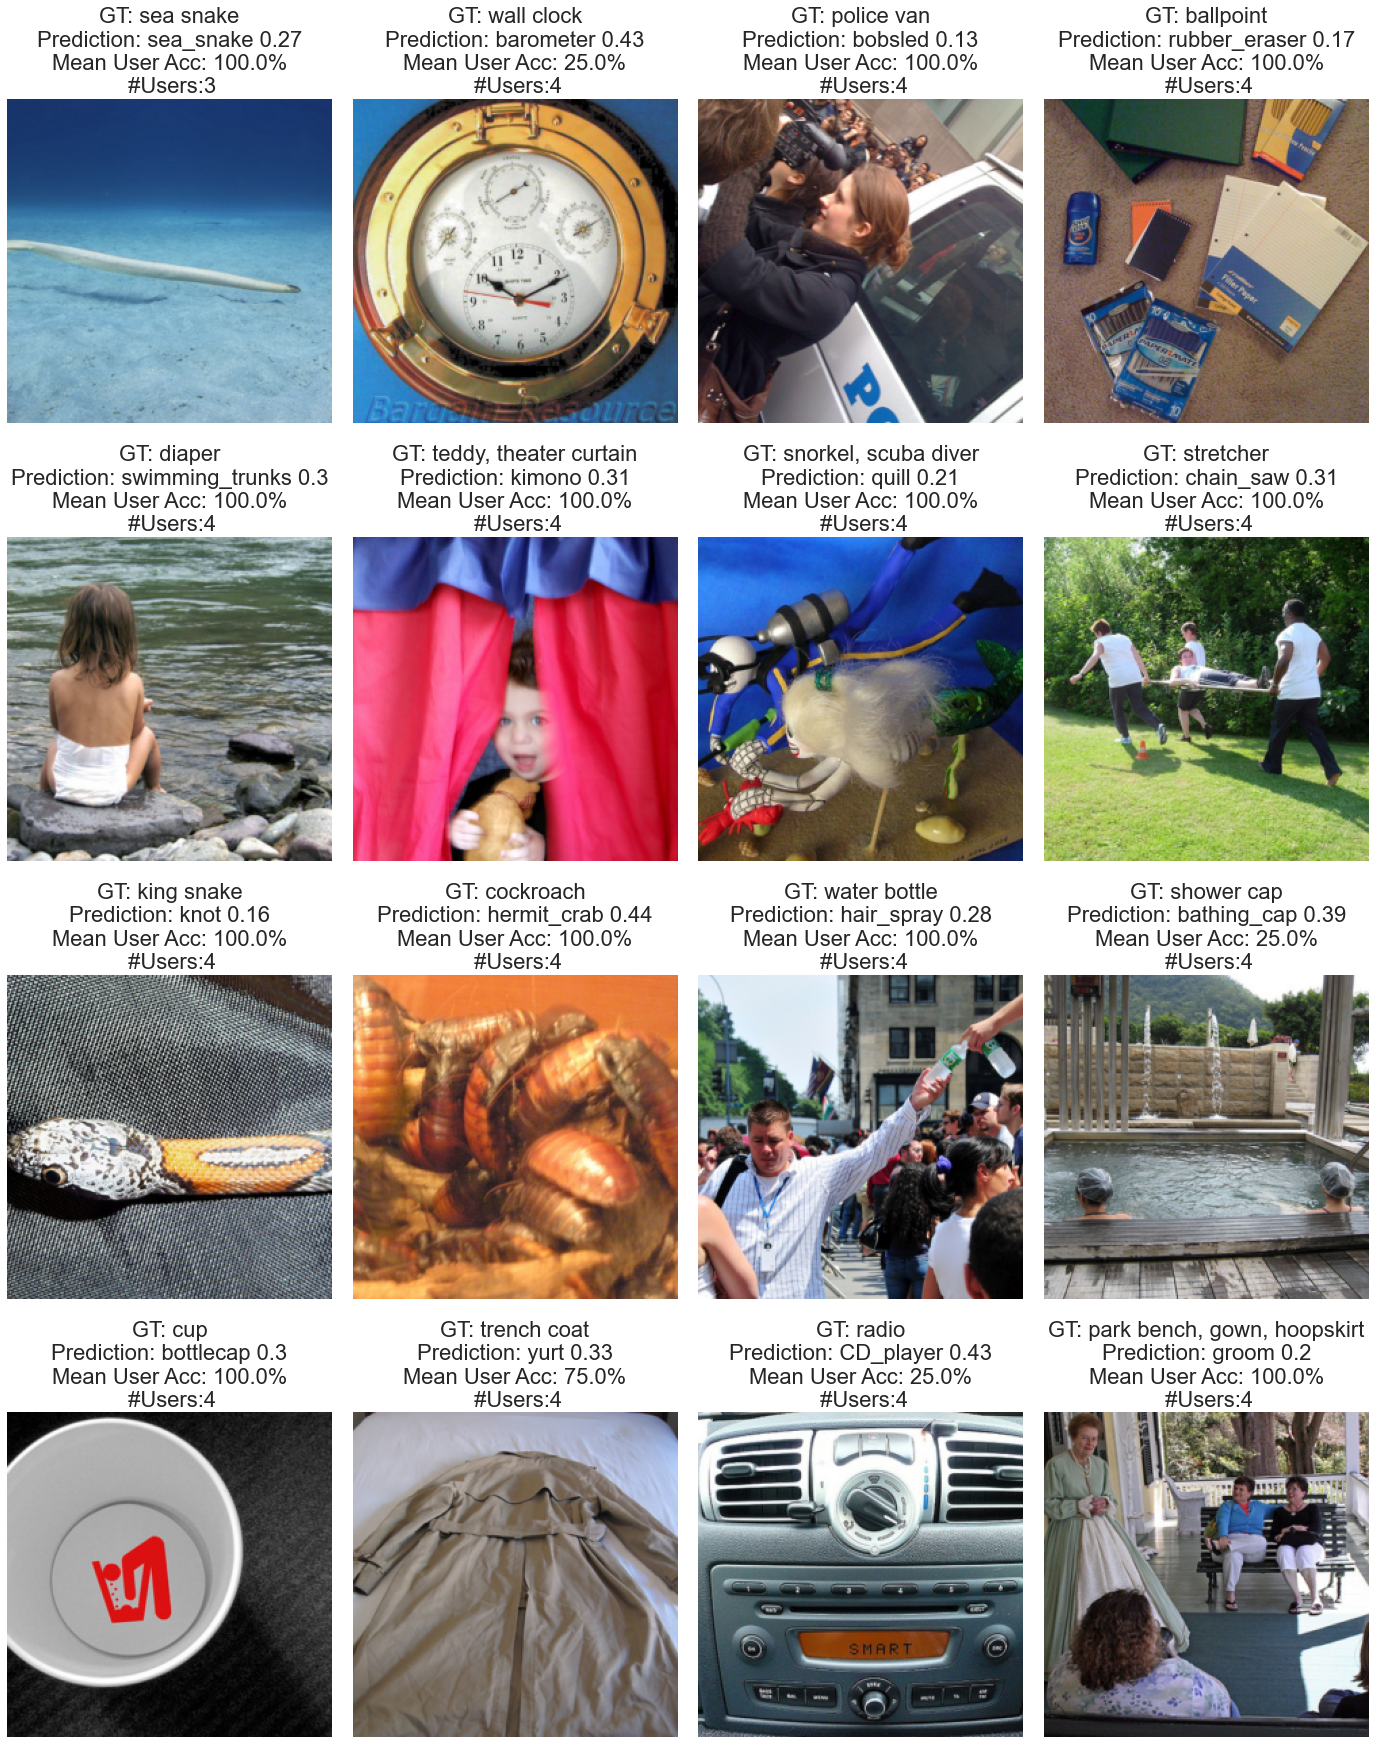

In [118]:
scale_factor = 6
fig, axes = plt.subplots(4, 4, figsize=(3.25 * scale_factor, 4 * scale_factor))

for ax in axes.flat:
    ax.set_axis_off()


for i in range(4):
    for j in range(4):
        CTR = 5+(i * 4 + j)
        item = str(Q[CTR])
        tmp = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]
        users = tmp[tmp["Query"] == Q[CTR]]
        axes[i, j].imshow(
            display_transform(
                Image.open(
                    f"./Datasets/ILSVRC2012_img_val/{item}"
                )
            )
        )

        mua = (100*np.mean(users["Correctness"])).round(2)
        gt_real_labels = ", ".join(
            [x.replace("_", " ").lower() for x in ast.literal_eval(G[CTR])]
        )
        axes[i, j].set_title(
            f"GT: {gt_real_labels}\nPrediction: {str(P[CTR])} {float(C[CTR])}\nMean User Acc: {mua}%\n #Users:{users.shape[0]}",
            fontsize=22,
        )

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.35)
fig.savefig('resnet_50_human_ai_team.pdf', format='pdf', dpi=300, bbox_inches='tight')